<a href="https://colab.research.google.com/github/suhaankhan07/ZTF_1/blob/main/ZTF_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv('ztf_new.csv')

In [ ]:
#Cleaning the dataset
df = df[df["filtercode"] == "zr"]
df = df[df["ngoodobs"] >= 50]

#creating is_it_star
is_it_star = None;
star_types = ["Star", "WD*", "EB*", "CataclyV*", "low_mass*"]
non_star_types = ["Galaxy", "QSO", "AGN", "Seyfert_1"]
df['is_it_star'] = df['main_type'].isin(star_types)

is_it_galaxy = None;
df['is_it_galaxy'] = df['main_type'].isin(non_star_types)
df_labeled = df[df['is_it_star'] | df['is_it_galaxy']]
df_labeled

,ra,dec,filtercode,ngoodobs,magrms,maxmag,meanmag,medianmag,minmag,percentiles_10,...,percentiles_75,percentiles_90,skewness,vonneumannratio,nbref,main_type,sigma_25,sigma_10,is_it_star,is_it_galaxy
13,0.006435,-0.092575,zr,336,0.072695,17.869564,17.600212,17.609388,17.251495,17.522058,...,17.405794,17.388424,-0.957494,1.570813,1.0,Galaxy,0.139308,0.087330,False,True
34,0.000682,-0.185682,zr,324,0.133820,18.914421,18.614860,18.619684,17.758076,18.468897,...,18.223866,18.207268,-1.317241,1.402500,2.0,Galaxy,0.249122,0.150787,False,True
43,0.067055,-0.232894,zr,301,0.167513,19.338420,18.900106,18.904139,17.958782,18.738537,...,18.450445,18.328750,-1.265677,1.619265,2.0,Seyfert_1,0.311457,0.165602,False,True
49,0.281426,-0.011895,zr,331,0.063515,18.773968,18.589214,18.596012,18.343440,18.517792,...,18.406586,18.394623,-0.651028,1.937280,1.0,Star,0.132587,0.078220,True,False
79,0.095402,-0.109838,zr,327,0.089519,19.633131,18.595713,18.593594,18.284653,18.531965,...,18.447704,18.440596,5.668102,2.045889,15.0,WD*,0.091314,0.061629,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70062,3.064802,-3.011334,zr,318,0.175403,18.950485,18.586100,18.598518,17.745308,18.395208,...,18.005842,17.927044,-1.406025,1.233653,1.0,Galaxy,0.357755,0.203310,False,True
70090,2.851172,-4.105940,zr,311,0.132065,16.905087,16.515831,16.472488,16.316862,16.395440,...,16.342733,16.340345,1.270238,1.560586,1.0,EB*,0.093490,0.077048,True,False
70092,2.872845,-4.079797,zr,310,0.076124,17.745697,17.547405,17.546711,17.147282,17.463180,...,17.353249,17.335909,-0.660405,1.516958,1.0,Galaxy,0.131834,0.083531,False,True
70178,3.363819,-3.673270,zr,307,0.092015,18.539433,18.279234,18.291164,17.537985,18.175636,...,18.111460,18.088642,-2.287859,0.793619,6.0,QSO,0.151359,0.115528,False,True


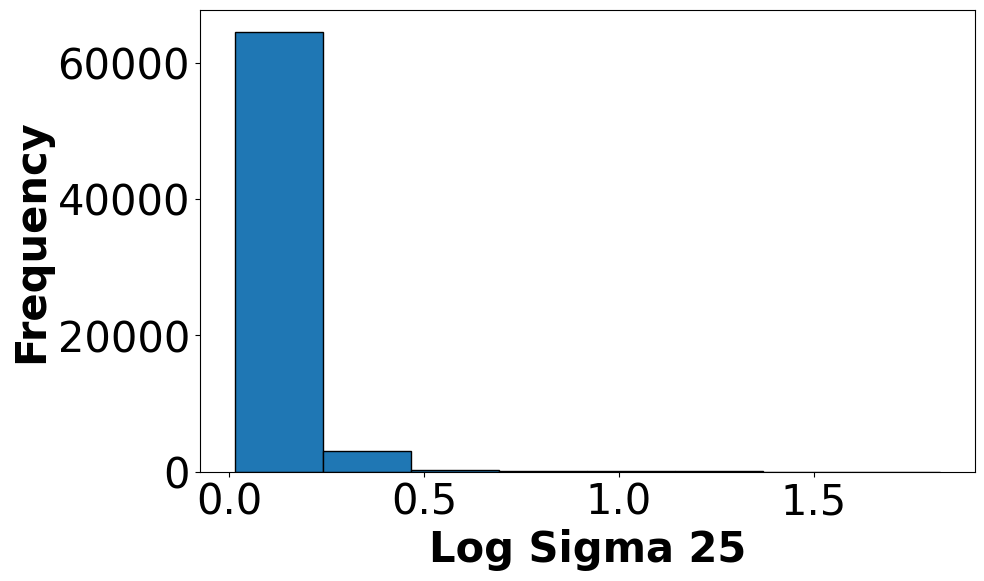

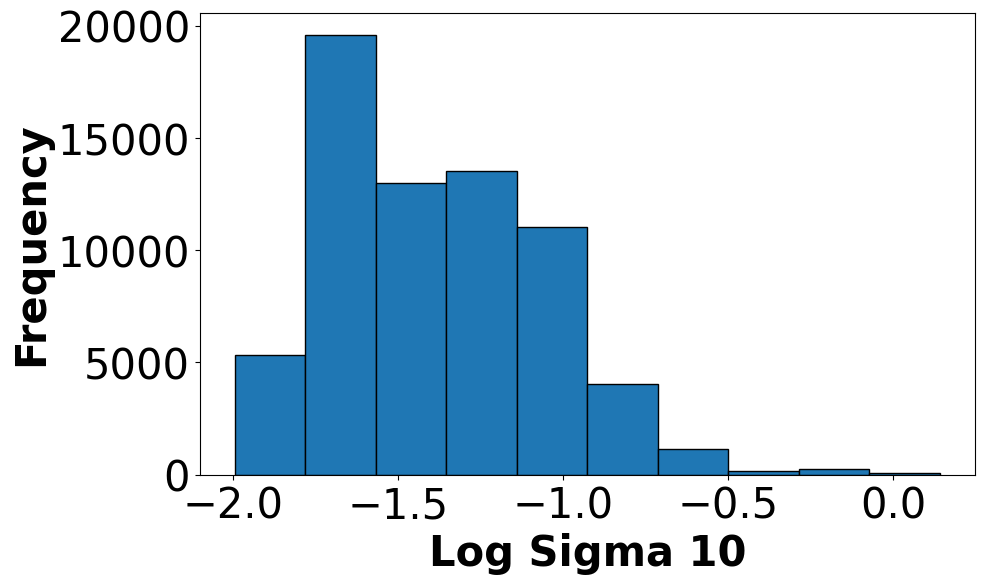

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


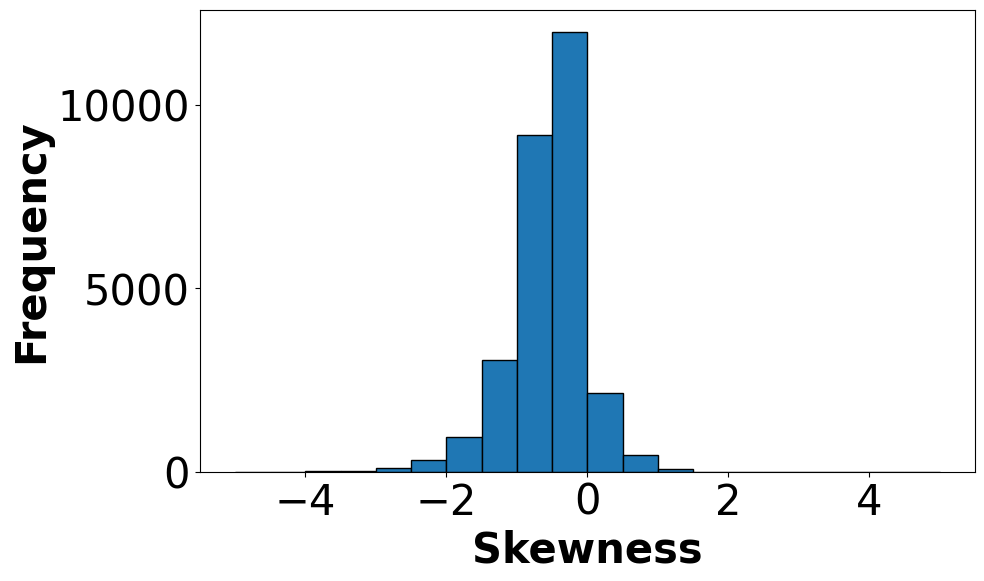

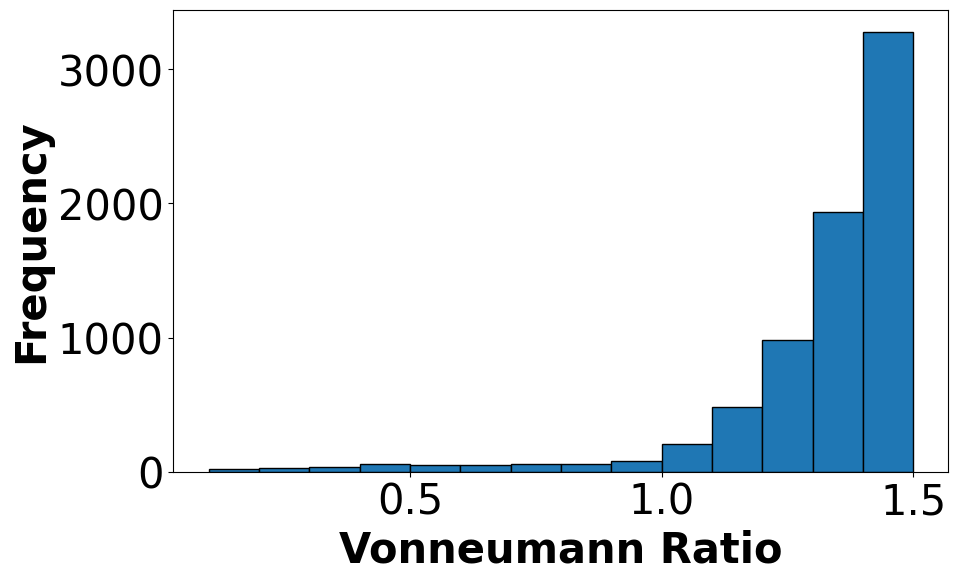

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Update font size for consistency
plt.rcParams.update({'font.size': 30})

# Histogram for Log Sigma 25
plt.figure(figsize=(10, 6))
plt.hist(df['sigma_25'], edgecolor="black", bins=8)  # Adjusted for log scale
plt.xlabel('Log Sigma 25', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.show()

# Histogram for Log Sigma 10
plt.figure(figsize=(10, 6))
plt.hist(np.log10(df["sigma_10"]), edgecolor="black", bins=10)  # Adjusted for log scale
plt.xlabel('Log Sigma 10', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.show()

# Histogram for Skewness (no change needed)
plt.figure(figsize=(10, 6))
plt.hist(np.log10(df["skewness"]), edgecolor="black", bins=np.arange(-5, 5.5, 0.5))
plt.xlabel('Skewness', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.show()

# Histogram for Vonneumann Ratio (no change needed)
plt.figure(figsize=(10, 6))
plt.hist(df["vonneumannratio"], edgecolor="black", bins=np.arange(0.1, 1.6, 0.1))
plt.xlabel('Vonneumann Ratio', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.show()


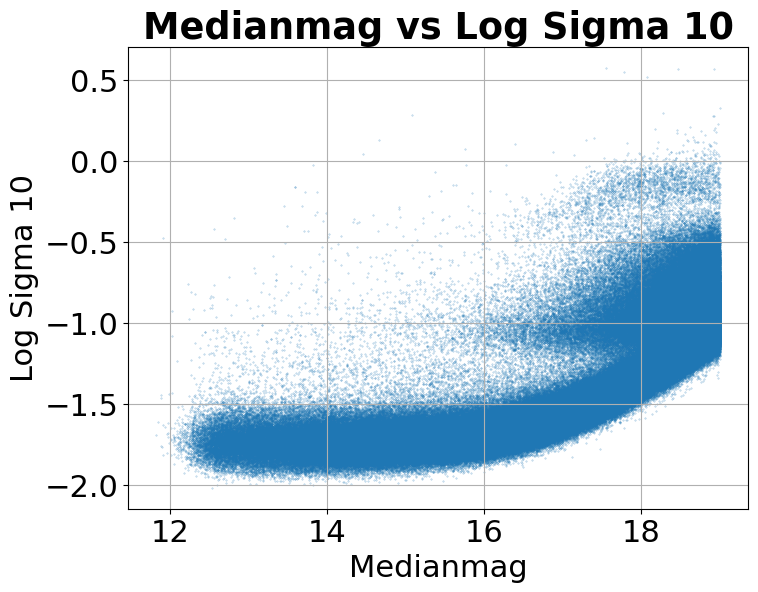

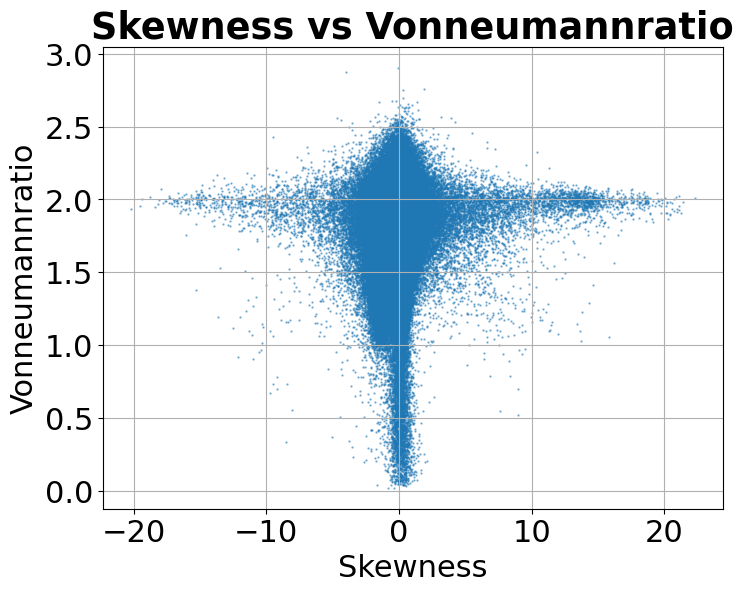

In [ ]:
# Scatter plot for Medianmag vs Log Sigma 10
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 22})
plt.scatter(df['medianmag'], np.log10(df['sigma_10']), alpha=0.5, s=0.1)
plt.title('Medianmag vs Log Sigma 10', fontweight="bold")
plt.xlabel('Medianmag')
plt.ylabel('Log Sigma 10')
plt.grid(True)
plt.show()
# This shows that higher medianmag often leads to higher Log Sigma 10


plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 22})
plt.scatter(df['skewness'], df['vonneumannratio'],alpha = 0.5, s = 0.5)
plt.title('Skewness vs Vonneumannratio', fontweight = "bold")
plt.xlabel('Skewness')
plt.ylabel('Vonneumannratio')
plt.grid(True)
plt.show()
# Shows that vonneumannratio tends to be more significant in more skewed stars

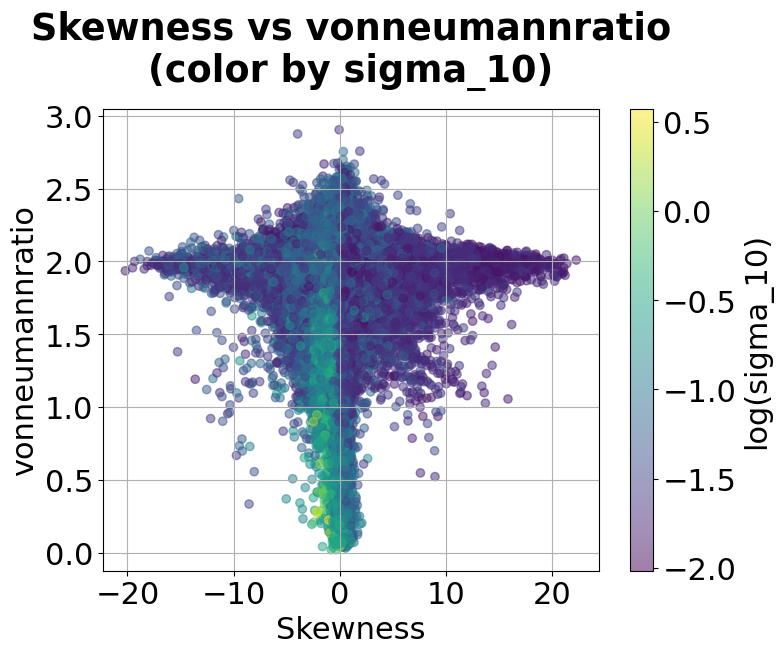

In [ ]:
import matplotlib.pyplot as plt

# Plot Skewness vs vonneumannratio, color by sigma_10
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(8, 6))
plt.scatter(df['skewness'], df['vonneumannratio'], cmap='viridis', alpha=0.5, c=np.log10(df['sigma_10']))
plt.colorbar(label = "log(sigma_10)")
plt.title('Skewness vs vonneumannratio\n(color by sigma_10)', fontweight = 'bold', pad=20)
plt.xlabel('Skewness')
plt.ylabel('vonneumannratio')
plt.grid(True)
plt.show()



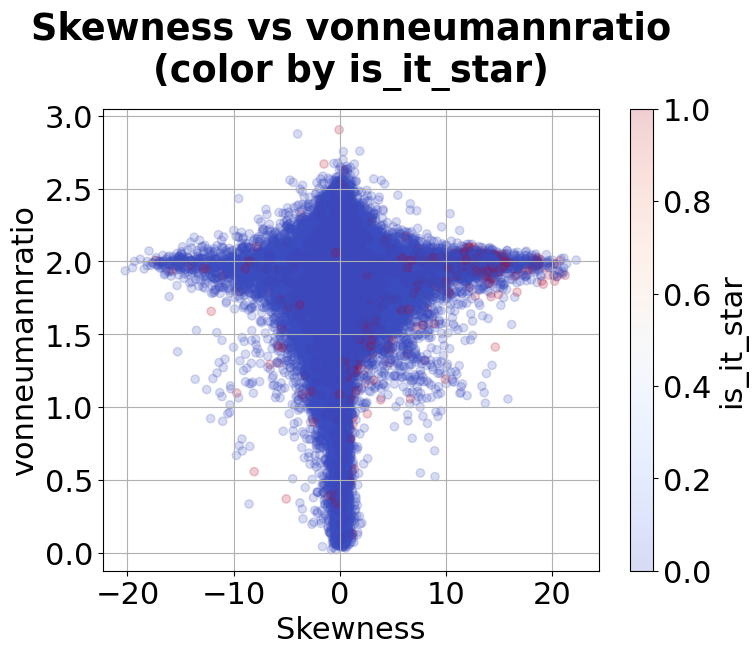

In [ ]:
import matplotlib.pyplot as plt

# Plot Skewness vs vonneumannratio, color by is_it_star
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(8, 6))
plt.scatter(df['skewness'], df['vonneumannratio'], c=df['is_it_star'], cmap='coolwarm', alpha=0.2)
plt.colorbar(label='is_it_star')
plt.title('Skewness vs vonneumannratio\n(color by is_it_star)', fontweight="bold", pad=20)
plt.xlabel('Skewness')
plt.ylabel('vonneumannratio')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

''' y_c = data['charges']
 X_c = data.drop(columns = 'charges')
 X_train_c, y_train_c, X_test_c, y_test_c = train_test_split(X_c, y_c, test_size = 0.2)
'''
X_c = df_labeled[['medianmag', 'skewness', 'vonneumannratio']]
y_c = df_labeled['is_it_star']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2)

logistic_model = LogisticRegression()
logistic_model.fit(X_train_c, y_train_c)
predictions = logistic_model.predict(X_test_c)

score = accuracy_score(y_test_c, predictions)

print('Logistic Regression Model Accuracy: {:.2%}'.format(score))

Logistic Regression Model Accuracy: 93.03%


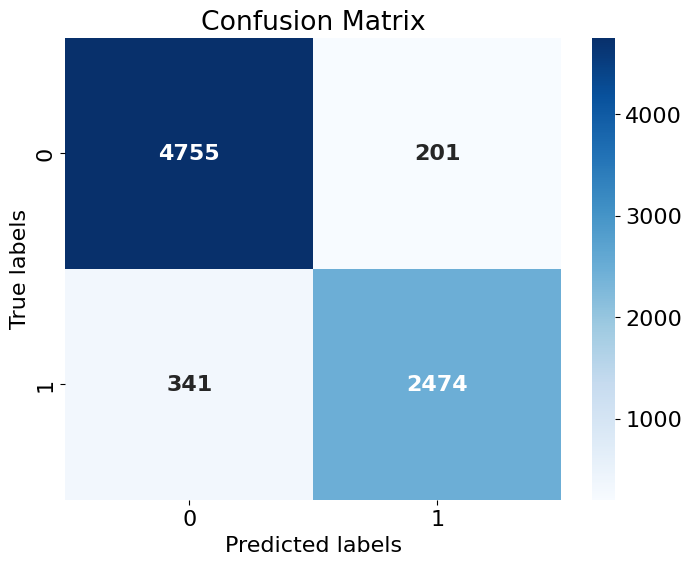

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_c, predictions)

# Plot the confusion matrix with percentages
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)

# Make the annotations bold
for text in plt.gca().texts:
    text.set_fontweight('bold')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


SVC Model Accuracy: 94.88%
SVC Model Precision: 94.13%
SVC Model Recall: 91.75%


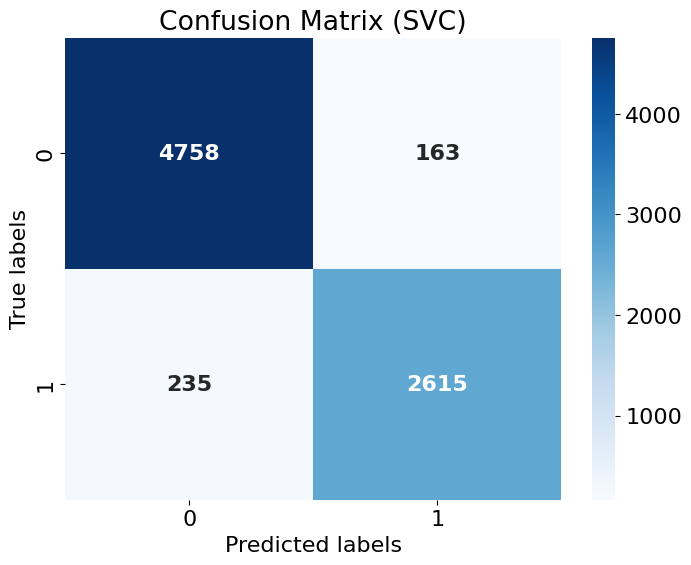

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

X_c = df_labeled[['medianmag', 'minmag', 'maxmag', 'meanmag','skewness', 'vonneumannratio', 'sigma_25', 'sigma_10']]
y_c = df_labeled['is_it_star']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2)

svc_model = SVC(kernel = 'linear')
svc_model.fit(X_train_c, y_train_c)
predictions = svc_model.predict(X_test_c)

acc_score = accuracy_score(y_test_c, predictions)
print('SVC Model Accuracy: {:.2%}'.format(acc_score))

prec_score = precision_score(y_test_c, predictions)
print('SVC Model Precision: {:.2%}'.format(prec_score))

rec_score = recall_score(y_test_c, predictions)
print('SVC Model Recall: {:.2%}'.format(rec_score))


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_c, predictions)

# Plot the confusion matrix with percentages
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)

# Make the annotations bold
for text in plt.gca().texts:
    text.set_fontweight('bold')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (SVC)')
plt.show()

Decision Tree Model Accuracy: 94.40%
Decision Tree Model Precision: 92.99%
Decision Tree Model Recall: 91.65%


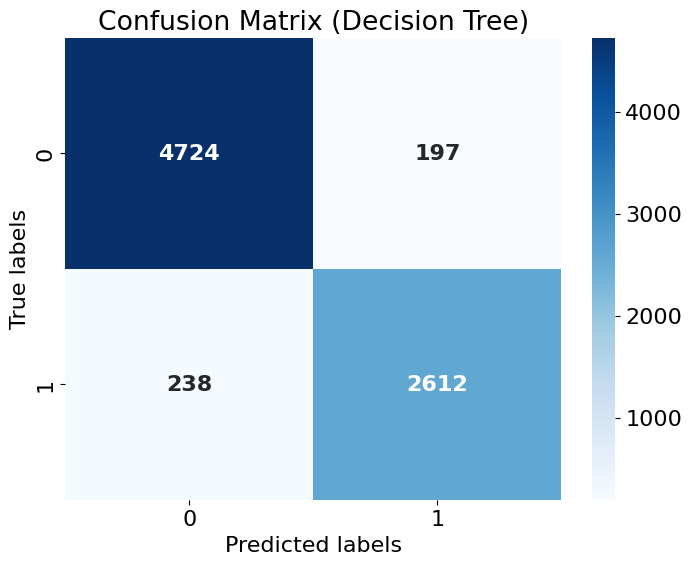

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Simulate ground truth labels: 1 for true microlensing, 0 for non-microlensing
def generate_labels(num_curves=100):
    # Assume first 50 curves are microlensing events (from injected signals)
    labels = [1 if i < 50 else 0 for i in range(num_curves)]
    return np.array(labels)

# Prepare dataset for ML
def prepare_dataset(light_curves, labels):
    # Compute statistics for the dataset
    stats_df = compute_advanced_statistics(light_curves)
    stats_df['Label'] = labels  # Add the target column
    return stats_df

# Plot confusion matrix as heatmap
def plot_confusion_matrix(y_true, y_pred, model_name):
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.rcParams.update({'font.size': 16})
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)

    # Make the annotations bold
    for text in plt.gca().texts:
        text.set_fontweight('bold')

    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()

# Train models and visualize confusion matrices
def train_and_plot_models(dataset):
    # Split into features (X) and target (y)
    X = dataset.drop(columns=['Curve Index', 'Label'])  # Features
    y = dataset['Label']  # Target

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Normalize the features (important for KNN)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # K-Nearest Neighbors
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    # Evaluate and plot confusion matrices
    print("K-Nearest Neighbors Classification Report:")
    print(classification_report(y_test, y_pred_knn))
    print("Accuracy:", accuracy_score(y_test, y_pred_knn))
    plot_confusion_matrix(y_test, y_pred_knn, model_name="KNN")

    print("\nRandom Forest Classification Report:")
    print(classification_report(y_test, y_pred_rf))
    print("Accuracy:", accuracy_score(y_test, y_pred_rf))
    plot_confusion_matrix(y_test, y_pred_rf, model_name="Random Forest")

# Main program
if __name__ == "__main__":
    # Generate light curves and inject signals
    light_curves = generate_light_curves()
    injected_light_curves = inject_signals(light_curves)

    # Generate labels (1 for microlensing, 0 otherwise)
    labels = generate_labels(num_curves=len(light_curves))

    # Prepare dataset
    dataset = prepare_dataset(injected_light_curves, labels)

    # Train models and plot confusion matrices
    train_and_plot_models(dataset)


KNN Model Accuracy: 94.84%
KNN Model Precision: 92.74%
KNN Model Recall: 93.23%


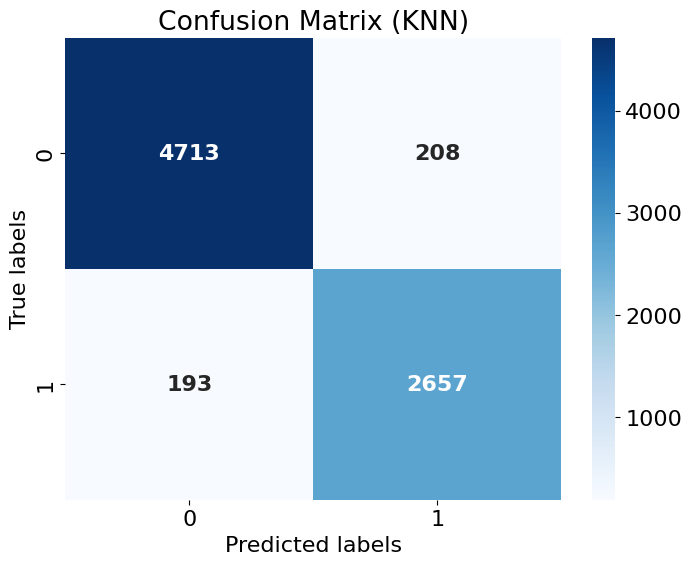

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

dec_tree_model = KNeighborsClassifier(n_neighbors = 7)
dec_tree_model.fit(X_train_c, y_train_c)
predictions = dec_tree_model.predict(X_test_c)

acc_score = accuracy_score(y_test_c, predictions)
print('KNN Model Accuracy: {:.2%}'.format(acc_score))

prec_score = precision_score(y_test_c, predictions)
print('KNN Model Precision: {:.2%}'.format(prec_score))

rec_score = recall_score(y_test_c, predictions)
print('KNN Model Recall: {:.2%}'.format(rec_score))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_c, predictions)

# Plot the confusion matrix with percentages
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)

# Make the annotations bold
for text in plt.gca().texts:
    text.set_fontweight('bold')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (KNN)')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define a grid of values for the number of neighbors
n_grid = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 200, 500, 1000, 2000]

# Lists to store evaluation metrics for each value of neighbors
accuracy_grid = []
prec_grid = []
rec_grid = []

# Loop through each value of neighbors
for n in n_grid:
    # Create a KNN classifier with current value of neighbors
    knn_model = KNeighborsClassifier(n_neighbors=n)

    # Train the model
    knn_model.fit(X_train_c, y_train_c)

    # Make predictions on the test set
    predictions = knn_model.predict(X_test_c)

    # Calculate and print accuracy
    acc_score = accuracy_score(y_test_c, predictions)
    print('KNN Model Accuracy with {} neighbors: {:.2%}'.format(n, acc_score))

    # Calculate and print precision
    prec_score = precision_score(y_test_c, predictions)
    print('KNN Model Precision with {} neighbors: {:.2%}'.format(n, prec_score))

    # Calculate and print recall
    rec_score = recall_score(y_test_c, predictions)
    print('KNN Model Recall with {} neighbors: {:.2%}'.format(n, rec_score))

    # Append evaluation metrics to corresponding lists
    accuracy_grid.append(acc_score)
    prec_grid.append(prec_score)
    rec_grid.append(rec_score)

KeyboardInterrupt: 

Text(0, 0.5, 'Accuracy Score')

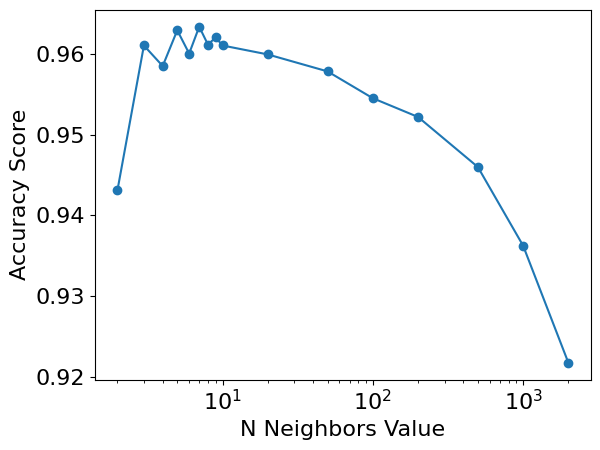

In [ ]:
plt.plot(n_grid, accuracy_grid, '-o')
plt.xscale('log')
plt.xlabel('N Neighbors Value')
plt.ylabel('Accuracy Score')


Text(0, 0.5, 'Precision Score')

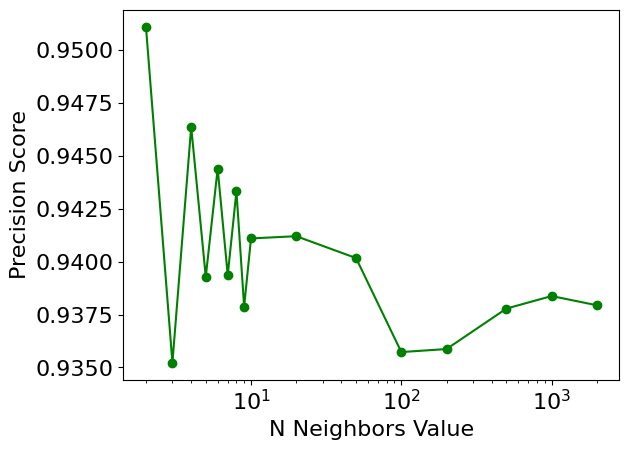

In [ ]:
plt.plot(n_grid, prec_grid, '-o', c = 'green')
plt.xscale('log')
plt.xlabel('N Neighbors Value')
plt.ylabel('Precision Score')

Text(0, 0.5, 'Recall Score')

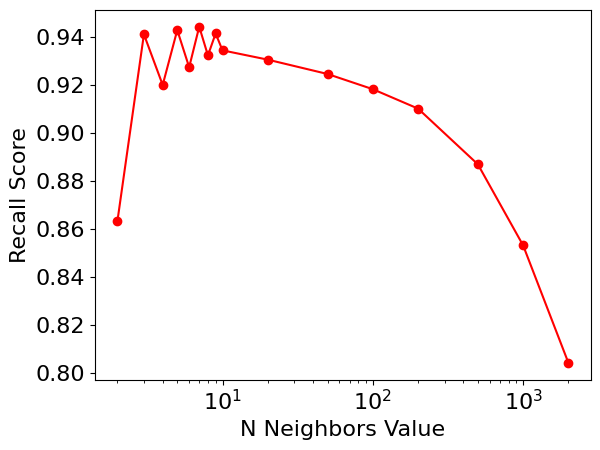

In [ ]:
plt.plot(n_grid, rec_grid, '-o', c = 'red')
plt.xscale('log')
plt.xlabel('N Neighbors Value')
plt.ylabel('Recall Score')

In [ ]:
plt.rcParams.update({'font.size': 16})
        df_labeled

,ra,dec,filtercode,ngoodobs,magrms,maxmag,meanmag,medianmag,minmag,percentiles_10,...,percentiles_75,percentiles_90,skewness,vonneumannratio,nbref,main_type,sigma_25,sigma_10,is_it_star,is_it_galaxy
13,0.006435,-0.092575,zr,336,0.072695,17.869564,17.600212,17.609388,17.251495,17.522058,...,17.405794,17.388424,-0.957494,1.570813,1.0,Galaxy,0.139308,0.087330,False,True
34,0.000682,-0.185682,zr,324,0.133820,18.914421,18.614860,18.619684,17.758076,18.468897,...,18.223866,18.207268,-1.317241,1.402500,2.0,Galaxy,0.249122,0.150787,False,True
43,0.067055,-0.232894,zr,301,0.167513,19.338420,18.900106,18.904139,17.958782,18.738537,...,18.450445,18.328750,-1.265677,1.619265,2.0,Seyfert_1,0.311457,0.165602,False,True
49,0.281426,-0.011895,zr,331,0.063515,18.773968,18.589214,18.596012,18.343440,18.517792,...,18.406586,18.394623,-0.651028,1.937280,1.0,Star,0.132587,0.078220,True,False
79,0.095402,-0.109838,zr,327,0.089519,19.633131,18.595713,18.593594,18.284653,18.531965,...,18.447704,18.440596,5.668102,2.045889,15.0,WD*,0.091314,0.061629,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619532,28.186454,-15.263477,zr,221,0.096970,17.629457,17.439007,17.447515,16.980873,17.333607,...,17.107613,17.093142,-1.417134,1.382257,1.0,Galaxy,0.195966,0.113908,False,True
619535,28.124049,-15.258402,zr,97,0.098148,17.058254,16.837755,16.850836,16.388884,16.741423,...,16.476597,16.423056,-1.800785,1.379076,1.0,Galaxy,0.182783,0.109413,False,True
619576,28.173769,-15.694784,zr,214,0.273854,18.520943,18.124605,18.200136,17.062014,17.765710,...,17.244905,17.207638,-1.454381,1.370842,1.0,Galaxy,0.686159,0.434426,False,True
619604,28.391428,-15.357519,zr,225,0.038707,18.188295,18.083708,18.084528,17.886066,18.036959,...,18.001904,18.001366,-0.395687,2.059408,1.0,Star,0.065975,0.047569,True,False


Text(0, 0.5, 'Declination “Sky Latitude” (deg)')

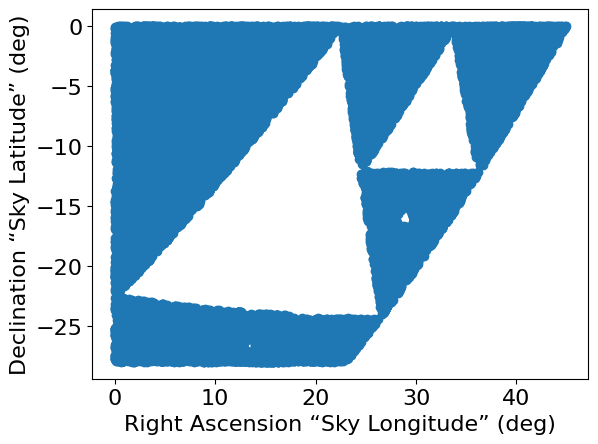

In [ ]:
#Plots which parts of the sky are being analyzed by the ZTF
plt.scatter(df_labeled['ra'], df_labeled['dec'])
plt.xlabel('Right Ascension “Sky Longitude” (deg)')
plt.ylabel('Declination “Sky Latitude” (deg)')

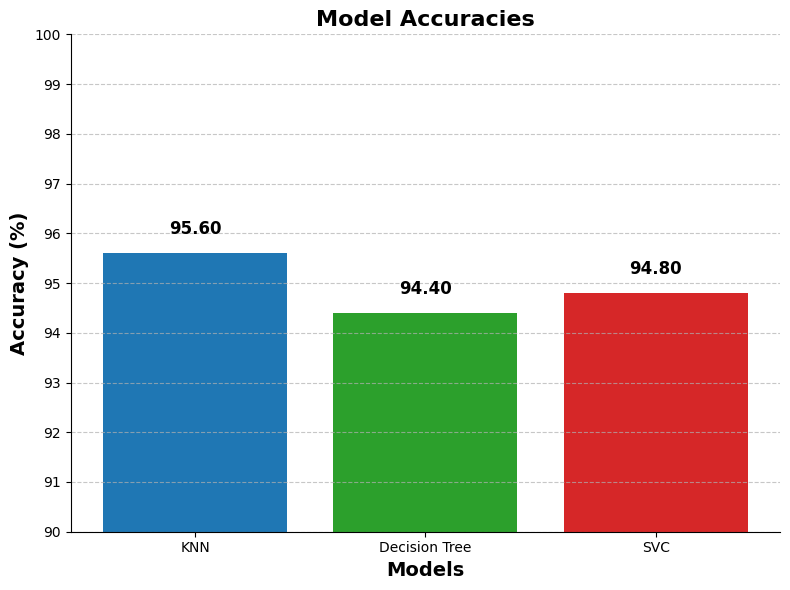

In [ ]:
import matplotlib.pyplot as plt

# Step 2: Prepare your data
models = ['KNN', 'Decision Tree', 'SVC']
accuracies = [95.60, 94.40, 94.80]  # Example accuracies, replace with your actual data

# Step 3: Create the bar graph
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size

# Plotting the bars with customized colors
bars = plt.bar(models, accuracies, color=['#1f77b4', '#2ca02c', '#d62728'])  # Using specified colors

# Adding data labels on top of each bar with bolded numbers
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, f'{accuracy:.2f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Adding labels and title with appropriate font sizes
plt.xlabel('Models', fontsize=14, fontweight='bold')  # Bold x-axis label
plt.ylabel('Accuracy (%)', fontsize=14, fontweight='bold')  # Bold y-axis label
plt.title('Model Accuracies', fontsize=16, fontweight='bold')  # Bold title

# Customizing y-axis range and increments
plt.ylim(90, 100)
plt.yticks(range(90, 101, 1))

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


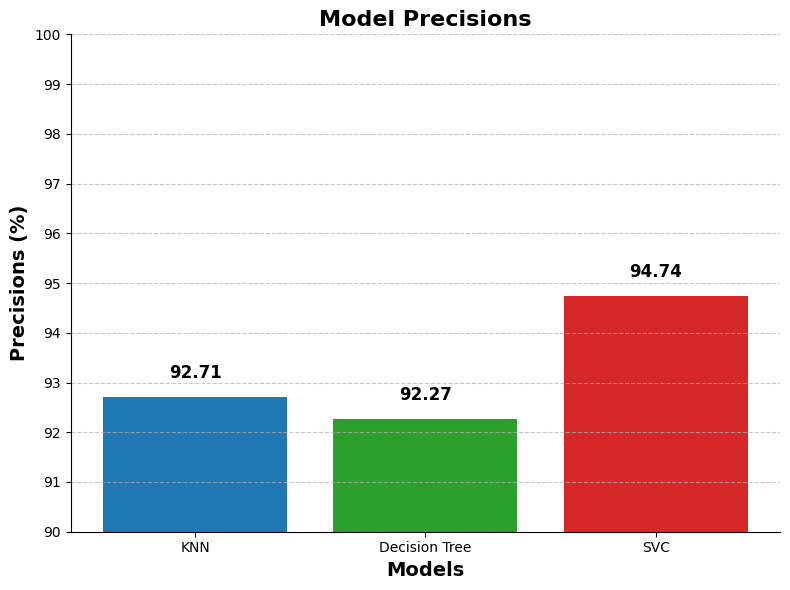

In [ ]:
import matplotlib.pyplot as plt

# Step 2: Prepare your data
models = ['KNN', 'Decision Tree', 'SVC']
accuracies = [92.71, 92.27, 94.74]  # Example accuracies, replace with your actual data

# Step 3: Create the bar graph
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size

# Plotting the bars with customized colors
bars = plt.bar(models, accuracies, color=['#1f77b4', '#2ca02c', '#d62728'])  # Using specified colors

# Adding data labels on top of each bar with bolded numbers
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, f'{accuracy:.2f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Adding labels and title with appropriate font sizes
plt.xlabel('Models', fontsize=14, fontweight='bold')  # Bold x-axis label
plt.ylabel('Precisions (%)', fontsize=14, fontweight='bold')  # Bold y-axis label
plt.title('Model Precisions', fontsize=16, fontweight='bold')  # Bold title

# Customizing y-axis range and increments
plt.ylim(90, 100)
plt.yticks(range(90, 101, 1))

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


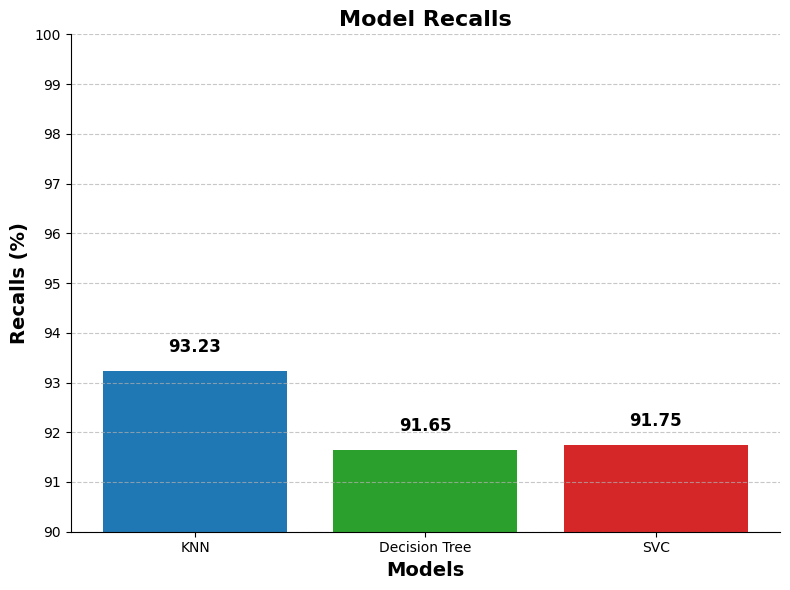

In [ ]:
import matplotlib.pyplot as plt

# Step 2: Prepare your data
models = ['KNN', 'Decision Tree', 'SVC']
accuracies = [93.23, 91.65, 91.75]  # Example accuracies, replace with your actual data

# Step 3: Create the bar graph
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size

# Plotting the bars with customized colors
bars = plt.bar(models, accuracies, color=['#1f77b4', '#2ca02c', '#d62728'])  # Using specified colors

# Adding data labels on top of each bar with bolded numbers
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, f'{accuracy:.2f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Adding labels and title with appropriate font sizes
plt.xlabel('Models', fontsize=14, fontweight='bold')  # Bold x-axis label
plt.ylabel('Recalls (%)', fontsize=14, fontweight='bold')  # Bold y-axis label
plt.title('Model Recalls', fontsize=16, fontweight='bold')  # Bold title

# Customizing y-axis range and increments
plt.ylim(90, 100)
plt.yticks(range(90, 101, 1))

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()
